In [191]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
from sklearn.metrics import mean_squared_error 
from math import sqrt

Sources Used:
https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

In [138]:
pwd()

'/Users/basillatif/Desktop/Data&Prgm Analytics'

In [195]:
airbnb_df = pd.read_csv("/Users/basillatif/Desktop/Airbnb Project/aribnb_final_clean.csv")

In [196]:
airbnb_df.head()

,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,last_review,availability_365,number_of_reviews
0,1,Apartment,Entire home/apt,6,2.0,2.0,3,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",122,500,240,3,25,42505.0,165,2
1,2,House,Entire home/apt,6,1.0,3.0,3,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",168,0,100,6,0,43394.0,0,6
2,3,Apartment,Private room,1,1.5,1.0,1,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",79,480,87,1,0,43680.0,276,21
3,4,Apartment,Private room,1,1.0,1.0,1,"{Internet,Wifi,Kitchen,Heating,Washer,Dryer,""S...",140,338,100,1,0,43680.0,346,19
4,5,Apartment,Entire home/apt,2,1.0,1.0,1,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",80,100,75,1,25,43554.5,0,0


In [205]:
target = pd.DataFrame(airbnb_df, columns=["price"])

In [28]:
target

,price
0,122
1,168
2,79
3,140
4,80
...,...
44460,89
44461,90
44462,47
44463,105


In [67]:
airbnb_df.property_type.unique()

array(['Apartment', 'House', 'Other'], dtype=object)

In [82]:
airbnb_df.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [85]:
room_dummy = pd.get_dummies(airbnb_df['room_type'])
room_dummy

,Entire home/apt,Private room,Shared room
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0
...,...,...,...
44460,0,1,0
44461,0,1,0
44462,0,1,0
44463,1,0,0


In [70]:
dummy_prop = pd.get_dummies(airbnb_df['property_type'])
dummy_prop

,Apartment,House,Other
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
44460,0,1,0
44461,1,0,0
44462,0,1,0
44463,1,0,0


In [86]:
airbnb_df = pd.concat([airbnb_df, dummy_prop, room_dummy], axis = 1)
airbnb_df.head()

,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,security_deposit,...,number_of_reviews,Apartment,House,Other,Apartment,House,Other,Entire home/apt,Private room,Shared room
0,1,Apartment,Entire home/apt,6,2.0,2.0,3,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",122,500,...,2,1,0,0,1,0,0,1,0,0
1,2,House,Entire home/apt,6,1.0,3.0,3,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",168,0,...,6,0,1,0,0,1,0,1,0,0
2,3,Apartment,Private room,1,1.5,1.0,1,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",79,480,...,21,1,0,0,1,0,0,0,1,0
3,4,Apartment,Private room,1,1.0,1.0,1,"{Internet,Wifi,Kitchen,Heating,Washer,Dryer,""S...",140,338,...,19,1,0,0,1,0,0,0,1,0
4,5,Apartment,Entire home/apt,2,1.0,1.0,1,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",80,100,...,0,1,0,0,1,0,0,1,0,0


**Now, I will build a model using the 2 most correlated variables with price: bathrooms and security deposit

In [44]:
bath = airbnb_df['bathrooms']
sec = airbnb_df['security_deposit']

* Model for bath predicting price

In [45]:
model = sm.OLS(target, bath).fit()
#bath = sm.add_constant(bath) ## let's add an intercept (beta_0) to our model
predictions = model.predict(bath) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.313
Model:                            OLS   Adj. R-squared (uncentered):              0.313
Method:                 Least Squares   F-statistic:                          2.025e+04
Date:                Sun, 01 Dec 2019   Prob (F-statistic):                        0.00
Time:                        10:03:38   Log-Likelihood:                     -3.4114e+05
No. Observations:               44465   AIC:                                  6.823e+05
Df Residuals:                   44464   BIC:                                  6.823e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bathrooms    200.0816      1.406    142.286      0.000     197.325     202.838
==============================================================================
Omnibus:                    92153.833   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        424504127.161
Skew:                          17.680   Prob(JB):                         0.00
Kurtosis:                     480.364   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Model for security deposit predicting price

In [33]:
model = sm.OLS(target, sec).fit()
predictions = model.predict(sec) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.304
Model:                            OLS   Adj. R-squared (uncentered):              0.304
Method:                 Least Squares   F-statistic:                          1.941e+04
Date:                Sun, 01 Dec 2019   Prob (F-statistic):                        0.00
Time:                        09:54:08   Log-Likelihood:                     -3.4143e+05
No. Observations:               44465   AIC:                                  6.829e+05
Df Residuals:                   44464   BIC:                                  6.829e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
security_deposit     0.1563      0.001    139.320      0.000       0.154       0.158
==============================================================================
Omnibus:                    75140.843   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        399587989.994
Skew:                          10.865   Prob(JB):                         0.00
Kurtosis:                     466.903   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Now running the same model with 2 variables

In [50]:
X = airbnb_df[['bathrooms', 'security_deposit']]
model = sm.OLS(target, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.474
Model:                            OLS   Adj. R-squared (uncentered):              0.474
Method:                 Least Squares   F-statistic:                          2.003e+04
Date:                Sun, 01 Dec 2019   Prob (F-statistic):                        0.00
Time:                        10:10:58   Log-Likelihood:                     -3.3520e+05
No. Observations:               44465   AIC:                                  6.704e+05
Df Residuals:                   44463   BIC:                                  6.704e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
bathrooms          154.7196      1.290    119.910      0.000     152.191     157.249
security_deposit     0.1193      0.001    116.700      0.000       0.117       0.121
==============================================================================
Omnibus:                    84906.646   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        397431936.776
Skew:                          14.507   Prob(JB):                         0.00
Kurtosis:                     465.247   Cond. No.                     1.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Linear Regression in Sklearn

In [163]:
#drop the non numeric columns and the price variable because that is what we are predicting 
abb_lr = airbnb_df.drop(["id","property_type","room_type","amenities", "price", "last_review"],axis=1)
abb_lr.head()

,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,availability_365,number_of_reviews,Apartment,House,Other,Apartment,House,Other,Entire home/apt,Private room,Shared room
0,6,2.0,2.0,3,500,240,3,25,165,2,1,0,0,1,0,0,1,0,0
1,6,1.0,3.0,3,0,100,6,0,0,6,0,1,0,0,1,0,1,0,0
2,1,1.5,1.0,1,480,87,1,0,276,21,1,0,0,1,0,0,0,1,0
3,1,1.0,1.0,1,338,100,1,0,346,19,1,0,0,1,0,0,0,1,0
4,2,1.0,1.0,1,100,75,1,25,0,0,1,0,0,1,0,0,1,0,0


In [182]:
#Data frame with log transformed price column
price_t = pd.read_csv('price_transformed.csv')
price_t

,price_transformed
0,4.812184
1,5.129899
2,4.382027
3,4.948760
4,4.394449
...,...
44460,4.499810
44461,4.510860
44462,3.871201
44463,4.663439


In [167]:
lm = linear_model.LinearRegression()
model = lm.fit(abb_lr,price_t)

In [168]:
#printing the predictions
predictions = lm.predict(abb_lr)
print(predictions)

[[5.62374055]
 [5.2465947 ]
 [4.35495812]
 ...
 [4.2911712 ]
 [5.01201449]
 [4.68591879]]


In [162]:
#get r ^ 2 score
lm.score(abb_lr, price_t)

0.6632599674206985

In [169]:
lm.intercept_

array([3.69786827])

* Multiple Linear Regression 
Source: https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

In [170]:
X = abb_lr[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'availability_365', 'number_of_reviews', 'Apartment', 'House', 'Other', 'Apartment', 'House', 'Other', 'Entire home/apt', 'Private room', 'Shared room']].values
#y = airbnb_df['price'].values

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [172]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [174]:
#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
#coeff_df

In [175]:
y_pred = regressor.predict(X_test)

In [176]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [177]:
df1 = df.head(25)
df1

,Actual,Predicted
0,200,331.027554
1,130,113.003737
2,25,-56.653245
3,65,11.560334
4,135,95.798537
5,75,42.723176
6,197,302.892349
7,10,21.945979
8,50,21.228211
9,110,42.944210


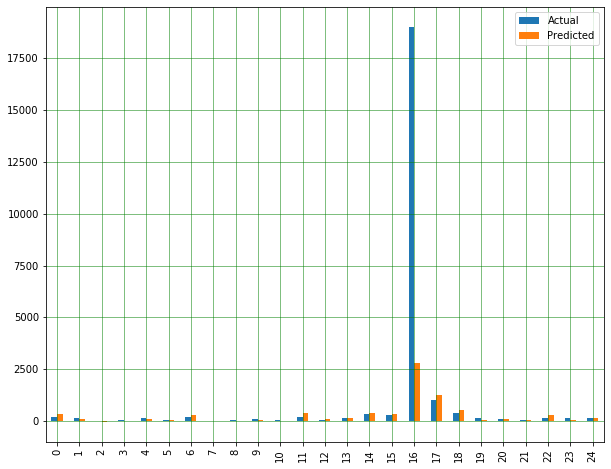

In [178]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [185]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 137.60650862397657
Mean Squared Error: 219427.6549325206
Root Mean Squared Error: 468.4310567549088


* Random Forest:
https://medium.com/ml2vec/data-analysis-on-the-airbnb-dataset-e0be9254eeb9

In [188]:
from sklearn.ensemble import RandomForestRegressor

In [192]:
l_X, l_y = abb_lr, airbnb_df['price'];
l_X_train, l_X_test, l_y_train, l_y_test = train_test_split(l_X, l_y, test_size=0.33, random_state=1024);

rf_classifier = RandomForestRegressor(n_estimators=400, criterion='mse', random_state=1024);
rf_classifier.fit(l_X_train, l_y_train)

l_y_pred = rf_classifier.predict(l_X_test);
l_y_pred_tr = rf_classifier.predict(l_X_train);

print(math.sqrt(mean_squared_error(l_y_test, l_y_pred)))
#print(math.sqrt(mean_squared_error(l_y_test, l_y_pred)))

369.55752635808665
369.55752635808665


In [208]:
l_X, l_y = abb_lr, np.ravel(price_t);
l_X_train, l_X_test, l_y_train, l_y_test = train_test_split(l_X, l_y, test_size=0.33, random_state=1024);

rf_classifier = RandomForestRegressor(n_estimators=400, criterion='mse', random_state=1024);
rf_classifier.fit(l_X_train, l_y_train)

l_y_pred = rf_classifier.predict(l_X_test);
l_y_pred_tr = rf_classifier.predict(l_X_train);

print(math.sqrt(mean_squared_error(l_y_test, l_y_pred)))

0.43172018828292535
